In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# DATA 607 - Machine Learning
## Class 1: Introduction
### 2025.02.24

#### Machine learning

- *Learn*, from data $(x_i, y_i)$, relationship between *variables* $x$ and $y$.

- Relationship is *stochastic*:

  $$
  y\sim p(y\mid x)
  $$

- $p_?$ is *unknown* and *unknowable*.

- Learn an approximation to $p$ itself or to its **regression function**,

  $$
  f(x) =\mathbb{E}[y\mid x].
  $$

#### Example: Predicting sales from ad spend

> "Suppose that we are statistical consultants hired by a client to
investigate the association between advertising and sales of a particular
product."

- We're given sales numbers and ad spend on TV, radio, and newspaper for 200 markets.

- We don't know $p$, the true distribution of sales given ad spend, but we might approximate it by the **linear model**:
  $$
  p \approx \operatorname{Normal}(\texttt{sales}\mid a + b\,\texttt{TV} + c\,\texttt{radio} + d\,\texttt{newspaper},\,\sigma^2)
  $$

- If we don't care about $\sigma^2$, we might just estimate the regression function, $f$:
$$
\begin{aligned}
f(\texttt{TV},\,\texttt{radio},\,\texttt{newspaper}) &= \mathbb{E}[\texttt{sales}\mid \texttt{TV},\,\texttt{radio},\,\texttt{newspaper}]\\
&\approx a + b\,\texttt{TV} + c\,\texttt{radio} + d\,\texttt{newspaper}
\end{aligned}
$$


#### Example: Credit card default prediction

- We want to predict whether a customers will default on their credit card debt based on income, monthly balance, and studentness.

- We model a customer defaulting using the **logistic regression model**:
  $$
  y\sim \operatorname{Bernoulli}\big(\texttt{default}\mid p\big),
  $$
  where
  $$
  \log\left(\frac p{1-p}\right) = a + b\,\texttt{income}+c\,\texttt{balance} + d\,\texttt{student}
  $$

#### Predictive models can inform decisions

  - How can we adjust our advertising stragety to increase sales?

  - Should we approve an applicants credit card application?

##### ⚠ Models don't know the big picture. ⚠

  - Our advertising model doesn't know about Youtube, Facebook, TikTok, etc. It gives a single predictive model for all 200 markets, so it has no "local knowledge".

  - Decision on a credit card application depends on our risk tolerance in addition to the applicant's risk. Also, we need to decide on an interest rate.

#### Inference from models

- Sometimes we are content to use a model as a *black box* for generating predictions. 

- Other times, we want more refined, granular understanding of the association between the target/output variable $y$ and the input/feature/predictor variables $x$.

  - Statistical hypothesis tests about model parameters.

  - Model interpretation and insights.

#### Example: An insight from the credit card default model

- Odds of defaulting:&nbsp;
$\displaystyle{{o} = \frac{p}{1-p}}$
- From the logistic regression model:
$$
\begin{aligned}
\log\frac{o_{\text{student}}}
{o_{\text{nonstudent}}} &=
\log\left(\frac{p_{\text{student}}}{1-p_{\text{student}}}\right) - \log\left(\frac{p_{\text{nonstudent}}}{1-p_{\text{nonstudent}}}\right)\\
&= \phantom{-}(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(1))\\&\phantom{=}-(a + b\,\texttt{income}+c\,\texttt{balance} + d\,(0))\\
&= d\\
\frac{o_{\text{student}}}{o_{\text{nonstudent}}} &= e^{d}\approx 0.54
\end{aligned}
$$

- ***The odds of a student defaulting are roughly half those of a nonstudent with comparable income and balance.***

#### Exercise

- For each of the following target variables $y$, what feature variables $x$ might be associated with $y$? Would a model predicting $y$ from these $x$ be useful as *black box* for generating predictions? Could useful inferences be drawn from such a model?

  - $y$ = weight of newborn baby

  - $y$ = demand for avocados

  - $y$ = standardized test score

  - $y$ = Customer purchased upgrade?

  - $y$ = Cancer returned within 10 years?

  - $y$ = next token



#### Fitting a `scikit-learn` model to data

```python
import pandas as pd
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data/Default.csv")
X = data[["income", "balance", "student"]]
y = data["default"]

model = LogisticRegression()
model.fit(X, y)
print(model.intercept_, model.coef_)
```

`[-10.9018116] [[ 3.96189932e-06  5.73060606e-03 -6.12564504e-01]]`

#### Using a `scikit-learn` model to predict

- Will a student (resp., nonstudent) with an income of $10,000 and a balance of $1950 default?

  ```python
  x = pd.DataFrame({
      "income": [10000, 10000],
      "balance": [1950, 1950],
      "student": [1, 0]
  })
  model.predict(x)
  ```

  `array([0, 1])`

- The model perdicts that the student won't default (prediction `0`) but the nonstudent will (prediction `1`).

#### Using a `scikit-learn` model to predict probabilities

- What is the probability that a student (resp., nonstudent) with an income of $10,000 and a balance of $1950 default?

  ```python
  model.predict_proba(x)
  ```
  ```
  array([[0.57446092, 0.42553908],
       [0.42250727, 0.57749273]])
  ```

- The first column of the output is probability of class label `0` (no default); the second column is the probability of class label `1` (default).

- The predicted class label is the one with the larger probability:

  ```python
  assert np.all(model.predict_proba(x).argmax(axis=1) == model.predict(x))
  ```

#### Exercises

- **(1)** Use the probabilities from `model.predict_proba(x)` to confirm that
  $$
  \frac{o_{\text{student}}}{o_{\text{nonstudent}}} = 0.54.
  $$

- **(2)** The file `data/enrollment.csv` contains (fake) historical data on SAT scores and GPAs of university applicants, together with the scholarship they were offered and whether they ended up enrolling.

  - **(a)** Fit a logistic regression model to predict whether a student will enroll given their SAT score, GPA, and scholarship offer.

  - **(b)** Plot predicted enrollment probability versus scholarshop offer for a student with an SAT score of 1300 and a GPA of 3.3. What scholarship offer will result in an 80% chance of such a student enrolling?

#### Nonparametric models

- The linear model assumes a particular functional form for the regression function:
$$
\mathbb{E}[y\mid x] = a + bx
$$

- Nonparametric models make no explicit assumptions about the form of $\mathbb{E}[y\mid x]$.

- They are extremely flexible and can be fit to datasets displaying decidedly nonlinear patterns.

- There are tradeoffs, though. More on those later.

#### Example: Curve fitting

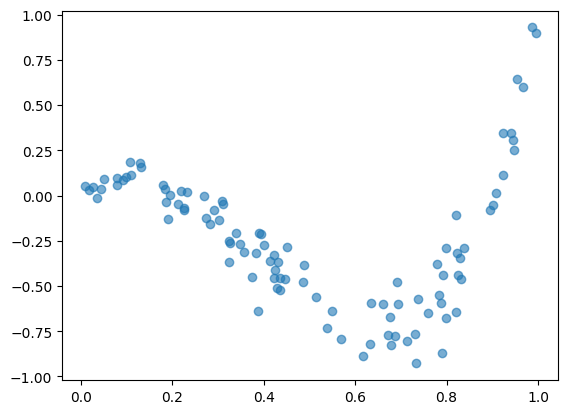

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


def make_data(n=100):
    x = np.random.uniform(size=n)
    y = 10 * x * (x - 0.2) * (x - 0.9) + (10 * x + 1) * 0.02 * np.random.normal(size=n)
    return x, y


x, y = make_data()
plt.scatter(x, y, alpha=0.6)

model = KNeighborsRegressor()